# Single Neuron Regression Model one feature

In this notebook we implement the single neuron model together with the gradient descent algorithm in order to solve a linear regression problem.

In [213]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## Data retrieval
The data is retrieved from the Energy Efficiency dataset from UCI repository: https://archive.ics.uci.edu/dataset/242/energy+efficiency

The idea is to predict the Heating Load (column Y1) of the building using the Surface Area (column X2).

In [214]:
# Load the dataset from the Excel file
file_path = '/Users/ceciliaalberti/Documents/INDE_577/datasets/ENB2012_data.xlsx' 
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [215]:
# Selection of X and y

X = df['X1'].values.reshape(-1, 1)  # Surface area
y = df['Y1'] # Heating Load

## Data pre-processing
1. The data will be split into training and testing datasets (80/20 split).
2. The data will be normalized for better training performance. This step ensures that all the features (columns) in the dataset are on the same scale.

In [216]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for better training performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [217]:
# Calculate mean and standard deviation of the target variable
y_mean = np.mean(y_test)
y_std = np.std(y_test)

print(f"Mean of Heating Load: {y_mean:.2f}")
print(f"Standard Deviation of Heating Load: {y_std:.2f}")

Mean of Heating Load: 22.91
Standard Deviation of Heating Load: 10.21


## Single Neuron creation
The Single Neuron class will simulate a single artificial neuron. In a neural network, a neuron is a fundamental unit that processes input data by applying a linear transformation (with weights and a bias) and then passes the result through an activation function.

In [218]:
# Define MAE and MSE functions
def mean_absolute_error(y_true, y_pred):
    """Calculate the Mean Absolute Error (MAE)."""
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    """Calculate the Mean Squared Error (MSE)."""
    return np.mean((y_true - y_pred) ** 2)

In [219]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron.

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias.
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean squared error computed after each iteration
        of stochastic gradient descent per epoch.

    Methods
    -------
    train(self, X, y, alpha=0.005, epochs=50)
        Trains the neuron using stochastic gradient descent.

    predict(self, X)
        Predicts the output for given input X.
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha=0.005, epochs=50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        self.mae_ = []
        self.mse_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            predictions = []
            for xi, target in zip(X, y):
                y_hat = self.predict(xi)
                predictions.append(y_hat)
                error = (y_hat - target)
                self.w_[:-1] -= alpha * error * xi
                self.w_[-1] -= alpha * error
                errors += 0.5 * (error ** 2)
            # Calculate MAE and MSE for the epoch
            epoch_mae = mean_absolute_error(y, predictions)
            epoch_mse = mean_squared_error(y, predictions)
            self.errors_.append(errors / N)
            self.mae_.append(epoch_mae)
            self.mse_.append(epoch_mse)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)
    

In [220]:
# Linear activation function
def linear_activation(x):
    return x


## Model training and data visualization
Two visualizations will be created to evaluate the performance of the single neuron model.

In [221]:
# Train the model
alpha = 0.0001  # smaller learning rate for demonstration
epochs = 50
node = SingleNeuron(activation_function=linear_activation)
node.train(X_train_scaled, y_train, alpha=alpha, epochs=epochs)

In [222]:
# Make predictions on the test set
y_test_pred = node.predict(X_test_scaled)

# Calculate R-squared on the test set
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {test_r2:.4f}")

# Calculate MAE and MSE on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Test R-squared: 0.3406
Test MAE: 6.4669
Test MSE: 68.7280


The R-squared results indicate that the model's performance is not as strong as desired. This could potentially be improved by incorporating more features into the model. However, we have chosen to use only one feature in this instance to allow for visualization in a two-dimensional plot.


The MAE is lower than the standard deviation, which means that the model is performing better than a model that always predicts the mean. 

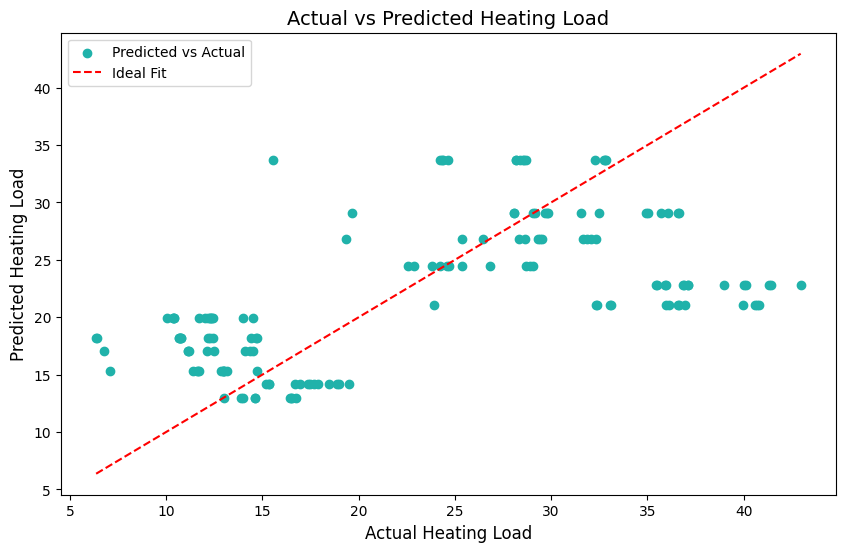

In [223]:
# Prediction plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color="lightseagreen", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Heating Load", fontsize=12)
plt.ylabel("Predicted Heating Load", fontsize=12)
plt.title("Actual vs Predicted Heating Load", fontsize=14)
plt.legend()
plt.show()

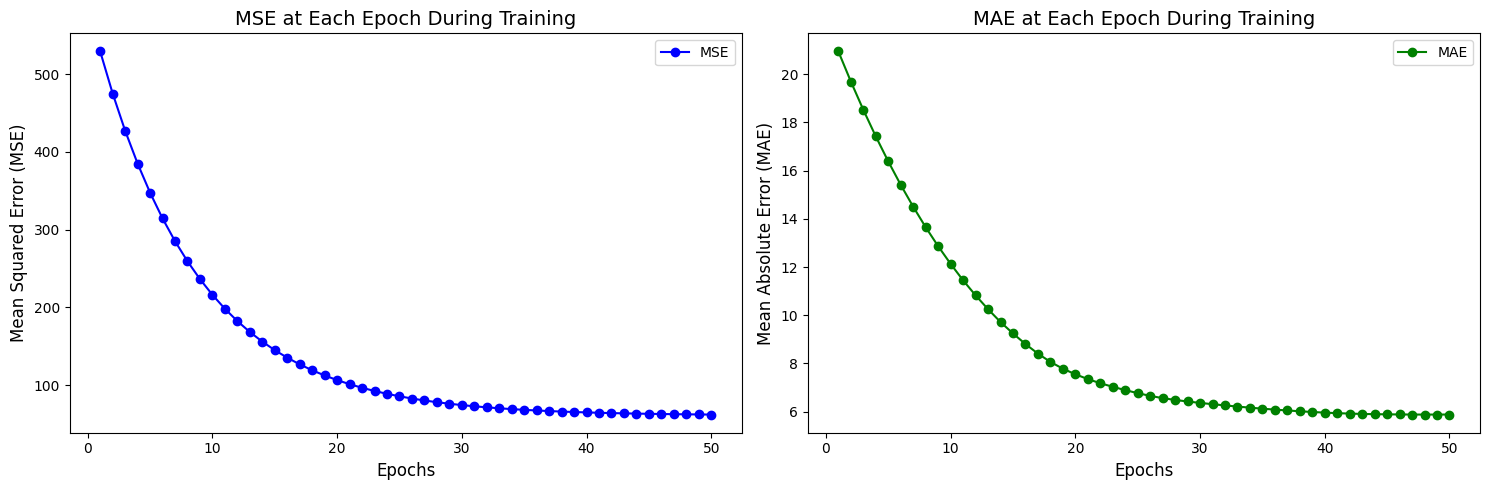

In [224]:
# Plot MSE and MAE over epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot MSE over epochs
ax1.plot(range(1, epochs + 1), node.mse_, marker='o', label='MSE', color='blue')
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax1.set_title('MSE at Each Epoch During Training', fontsize=14)
ax1.legend()

# Plot MAE over epochs
ax2.plot(range(1, epochs + 1), node.mae_, marker='o', label='MAE', color='green')
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Mean Absolute Error (MAE)', fontsize=12)
ax2.set_title('MAE at Each Epoch During Training', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()


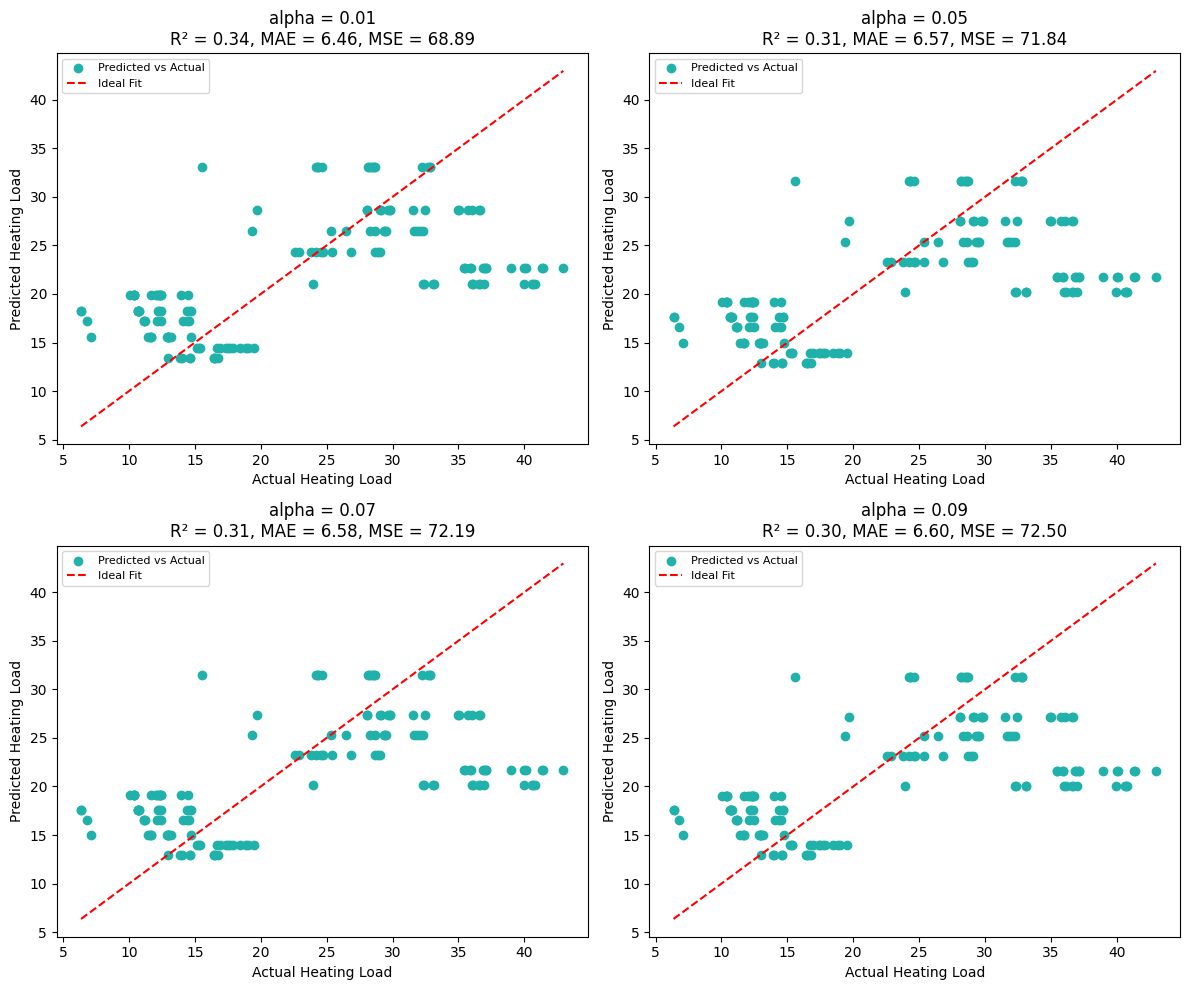

In [225]:
# Other possible choices of learning rates
alphas = [0.01, 0.05, 0.07, 0.09]

# Create subplots grid for multiple learning rates
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loop over the axs and alpha values, train the model, and plot the predictions
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(activation_function=linear_activation)
    node.train(X_train_scaled, y_train, alpha=alpha, epochs=100)

    # Make predictions on the test set
    y_test_pred = node.predict(X_test_scaled)

    # Calculate MAE, MSE, and R-squared on the test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Plot predicted vs actual values
    ax.scatter(y_test, y_test_pred, color="lightseagreen", label="Predicted vs Actual")
    ax.plot([min(y_test), max(y_test)],
            [min(y_test), max(y_test)],
            color='red',
            linestyle='--',
            label='Ideal Fit')

    # Display MAE, MSE, and R-squared in the plot title
    ax.set_title(f"alpha = {alpha}\nR² = {test_r2:.2f}, MAE = {test_mae:.2f}, MSE = {test_mse:.2f}",
                 fontsize=12)
    ax.set_xlabel("Actual Heating Load", fontsize=10)
    ax.set_ylabel("Predicted Heating Load", fontsize=10)
    ax.legend(fontsize=8)

# Show the plot grid
plt.tight_layout()
plt.show()



# Single Neuron Regression Model with more features
We'll try to use more features to see if the R2 improves.

## Data pre-processing
Same procedure, but this time we'll select all of the available features.

In [226]:
# Selection of X and y
# Include multiple features
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']].values 
y = df['Y1'].values  # Heating Load


In [227]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data for better training performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model training and evaluation

In [228]:
# Train the model
alpha = 0.001  # Adjusted learning rate
epochs = 50  # Increased number of epochs for better training
node = SingleNeuron(activation_function=linear_activation)
node.train(X_train_scaled, y_train, alpha=alpha, epochs=epochs)

In [229]:
# Make predictions on the test set
y_test_pred = node.predict(X_test_scaled)

# Calculate R-squared on the test set
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {test_r2:.4f}")

# Calculate MAE and MSE on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Test MAE: {test_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Test R-squared: 0.8479
Test MAE: 2.9599
Test MSE: 15.8561


The R-squared improved considerably when including more features. So did the MAE and MSE. 

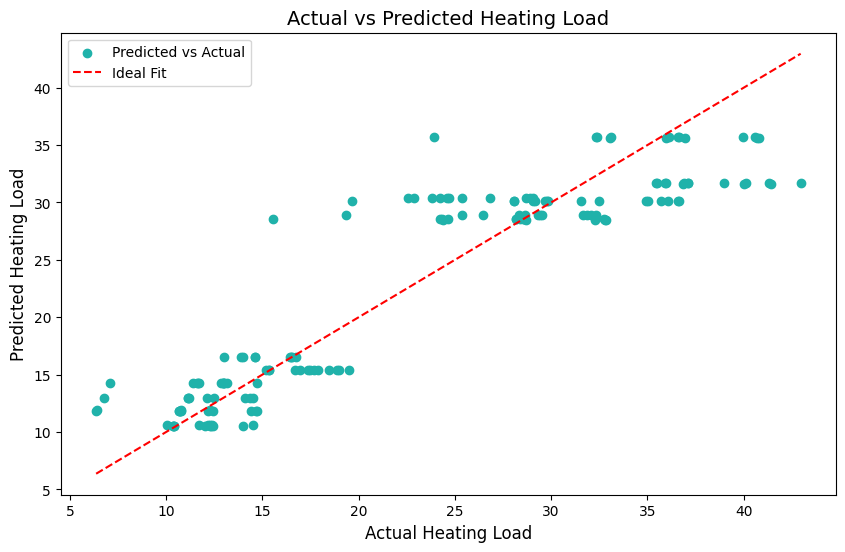

In [230]:
# Prediction plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color="lightseagreen", label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("Actual Heating Load", fontsize=12)
plt.ylabel("Predicted Heating Load", fontsize=12)
plt.title("Actual vs Predicted Heating Load", fontsize=14)
plt.legend()
plt.show()

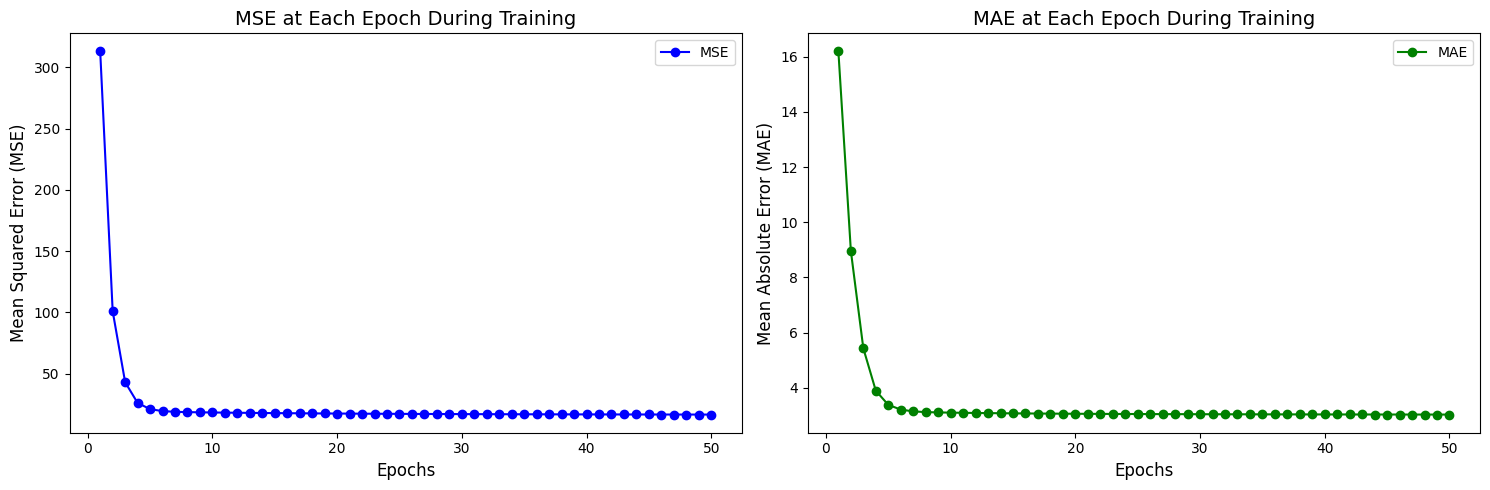

In [231]:
# Plot MSE and MAE over epochs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot MSE over epochs
ax1.plot(range(1, epochs + 1), node.mse_, marker='o', label='MSE', color='blue')
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax1.set_title('MSE at Each Epoch During Training', fontsize=14)
ax1.legend()

# Plot MAE over epochs
ax2.plot(range(1, epochs + 1), node.mae_, marker='o', label='MAE', color='green')
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Mean Absolute Error (MAE)', fontsize=12)
ax2.set_title('MAE at Each Epoch During Training', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()

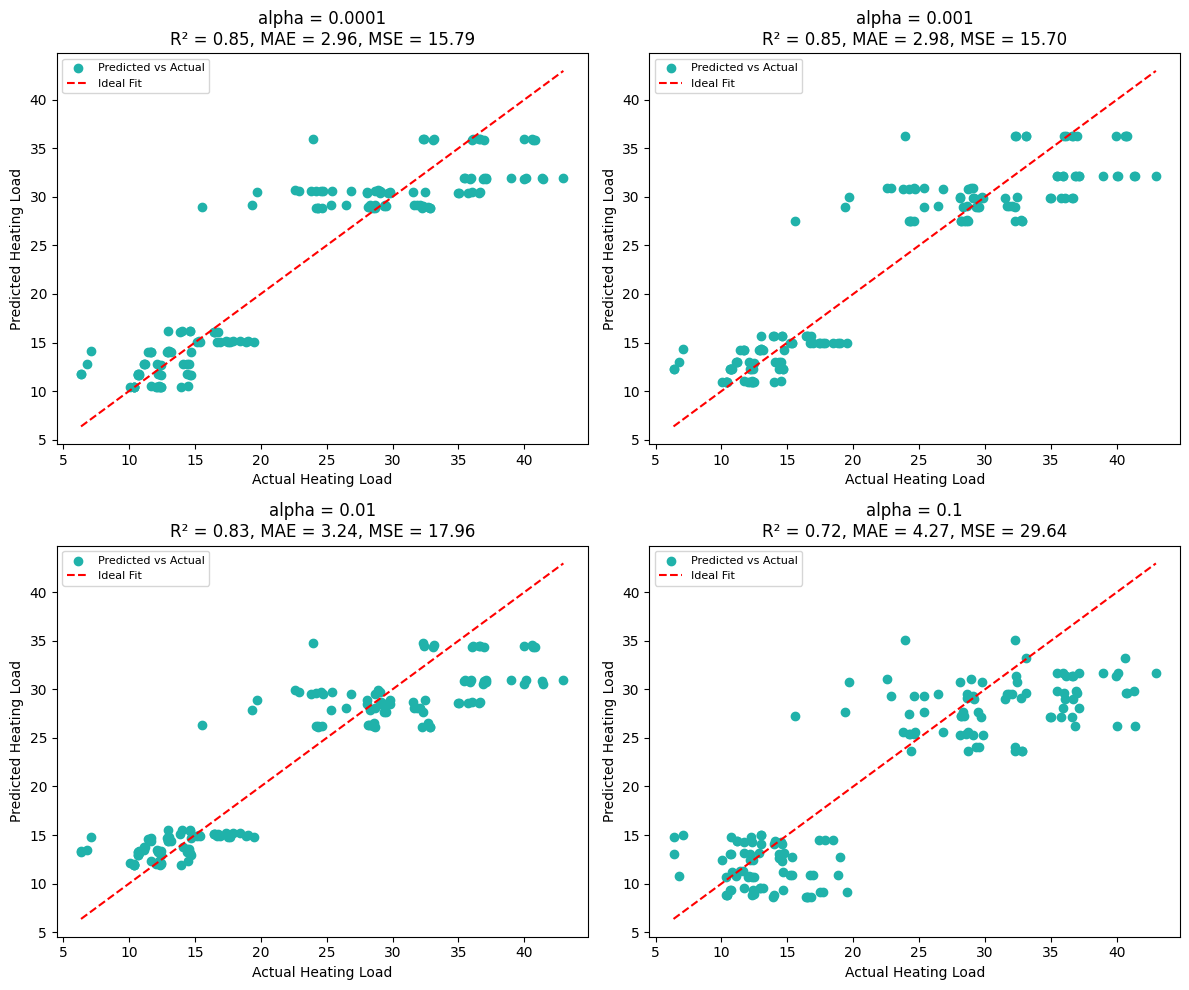

In [232]:
# Other possible choices of learning rates
alphas = [0.0001, 0.001, 0.01, 0.1]

# Create subplots grid for multiple learning rates
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Loop over the axs and alpha values, train the model, and plot the predictions
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(activation_function=linear_activation)
    node.train(X_train_scaled, y_train, alpha=alpha, epochs=500)

    # Make predictions on the test set
    y_test_pred = node.predict(X_test_scaled)

    # Calculate MAE, MSE, and R-squared on the test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Plot predictions vs actual
    ax.scatter(y_test, y_test_pred, color="lightseagreen", label="Predicted vs Actual")
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')

    # Display metrics in the plot title
    ax.set_title(f"alpha = {alpha}\nR² = {test_r2:.2f}, MAE = {test_mae:.2f}, MSE = {test_mse:.2f}", fontsize=12)
    ax.set_xlabel("Actual Heating Load", fontsize=10)
    ax.set_ylabel("Predicted Heating Load", fontsize=10)
    ax.legend(fontsize=8)

# Show the plot grid
plt.tight_layout()
plt.show()

## Conclusion
By incorporating more features into the model, is possible to observe an improvement in its predictive performance. This demonstrates the importance of feature selection and the impact it has on machine learning models. The model development process is iterative, and experimenting with different approaches is key to achieving the best results.